In [2]:
words = open('names.txt', 'r').read().splitlines()

In [4]:
# First 10 names
print('Data shape', len(words))
print('Word with minimum length', min(len(word) for word in words))
print(words[:10])

Data shape 32033
Word with minimum length 2
['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']


In [24]:
# converting each words into bigrams, ie taking two character of a word at a time.
# Create a dictionary of these bigrams as keys and their frequency as values
b = {}
for word in words:
    chs = ['<S>'] + list(word) + ['<E>']  # adding special characters indicating start and end of a word.
    for ch1,  ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0)+1

In [29]:
# The most frequent bigrams
sorted(b.items(), key = lambda item: item[1], reverse=True)[:10]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

In [30]:
# Convert the dictionary into a torch tensor
import torch

In [115]:
# To store the above dictionary in a arrat form. The i,j th entry represents the frequency of (N(i), N(j)) bigram.
N = torch.zeros((27, 27), dtype=torch.int32)

In [116]:
# Unique characters in the corpus
chars = sorted(list(set(''.join(word for word in words))))
char2int = {ch:i+1 for i, ch in enumerate(chars)}   # Dictionary assigining an integer corresponding to each charachters
char2int['.'] = 0       # assigning integer value to the start/stop word.
int2char = {i:ch for ch,i in char2int.items()}  # the character corresponding to integer.

In [121]:
for word in words:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        N[char2int[ch1], char2int[ch2]] += 1

In [118]:
import matplotlib.pyplot as plt

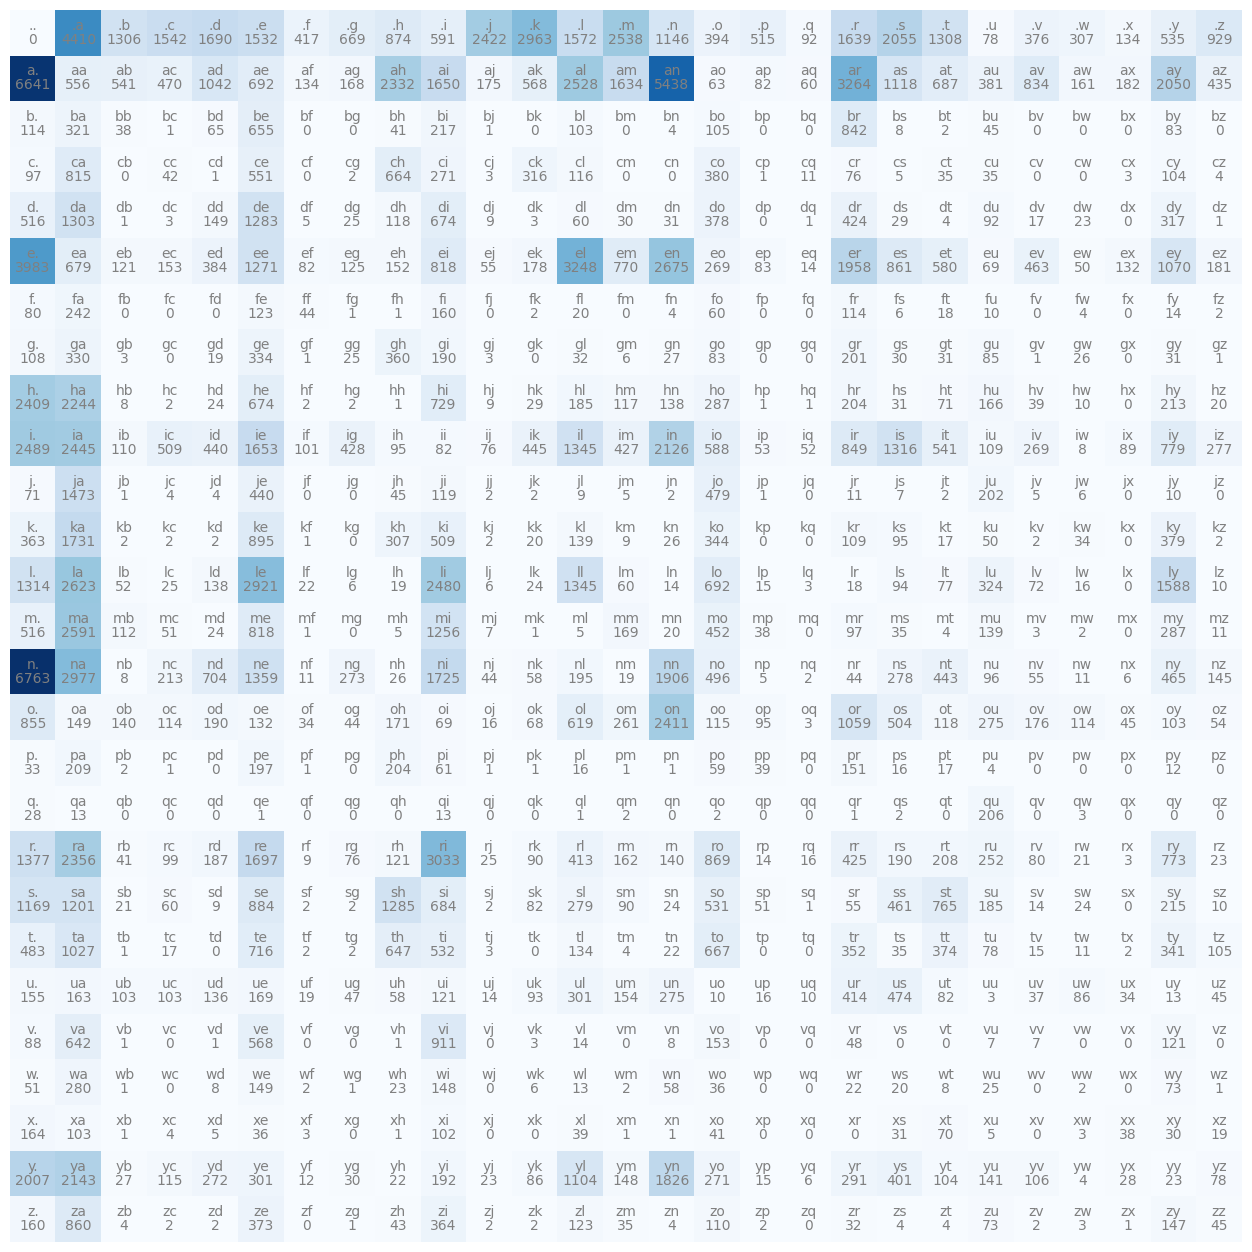

In [122]:
# Visualizing the word distribution.
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = int2char[i] + int2char[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [131]:
# Based on the bigram representation we can build various statitican and deep learning model to generate new names.
# 1. Model 1. Generate new names based on probability distribution of the words.

"""
1. Use the first row to generate the first character of our name where character will be choosed based on its underlying distribution.
2. The second character is chosen based on the probability distribution of the row corrsponding to the character generated in the first row.
3. Repeat the process until end stop character is obtained.
"""

# Calculate the row wise probability distribution of each character.
P = (N)/torch.sum(N, dim=1, keepdim=True)
P.shape

torch.Size([27, 27])

In [125]:
# How to use multonomial distribution for character generation?
g = torch.Generator().manual_seed(2147483647)
test1 = torch.rand(3, generator=g)
test1 /= torch.sum(test1)       # Generate probability distribution for three values.
print('The underlying probability distribution is:', test1)
torch.multinomial(test1, num_samples=100, replacement=True, generator=g)

The underlying probability distribution is: tensor([0.6064, 0.3033, 0.0903])


tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [135]:
p = P[0]
g = torch.Generator().manual_seed(2147483647)
int2char[torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()]

'j'

In [147]:
# Generate new words
g = torch.Generator().manual_seed(2147483647)
new_names = []
for _ in range(5):
    new_name = ''
    ix = 0
    while True:
        ix = torch.multinomial(P[ix], num_samples=1, replacement=True, generator=g).item()
        new_name += int2char[ix]
        if ix == 0:
            break
    new_names.append(new_name)

In [148]:
new_names

['junide.', 'janasah.', 'p.', 'cony.', 'a.']